# **Movie Data Project**

__Opening and cleaning data__

- Using pandas to create dataframes
- dropna to delte tows that have empty cells
- drop_duplicates to remove duplicate cells in the dataframe

In [1]:
import pandas as pd # Import pandas

movie_data = pd.DataFrame(pd.read_csv('movies.csv')) # Open movies files
ratings_data = pd.DataFrame(pd.read_csv('ratings.csv')) # Open ratings file

In [2]:
movie_data.dropna(inplace = True) # Removes nan values in movies file
movie_data.drop_duplicates(inplace = True) # Removes duplicates in movies file

In [3]:
ratings_data.dropna(inplace= True) # Removes nan values in ratings file
ratings_data.drop_duplicates(inplace = True) # Removes duplicates in ratings rile

__Merging and combining on the "movieId"__

In [4]:
data = pd.merge(movie_data, ratings_data, on=["movieId", "movieId"]) # Merges the two list based on the movieID

In [5]:
data

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4,4.0,1113765937
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,10,5.0,948885850
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,14,4.5,1442169375
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,4.0,1370810063
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,22,4.0,1237622631
...,...,...,...,...,...,...
27753439,193878,Les tribulations d'une caissière (2011),Comedy,176871,2.0,1537875080
27753440,193880,Her Name Was Mumu (2016),Drama,81710,2.0,1537886232
27753441,193882,Flora (2017),Adventure|Drama|Horror|Sci-Fi,33330,2.0,1537890512
27753442,193886,Leal (2018),Action|Crime|Drama,206009,2.5,1537917854


---

__Creating two seperate dataframes for the average movie and total ratings by "movieID", then adding years released__

- ratings is a dataframe displaying the average rating of each movie based on the "movieID"
- amount is a dataframe diplaying the total revieews of each movie 
- years is the years released by index

In [6]:
ratings = data.groupby(['title'])['rating'].sum() # The total rating for each movie is calculated based on movieID

In [7]:
ratings = data.groupby(['movieId', 'title'])['rating'].sum() # The average rating for each movie is calculated based on movieID

In [8]:
amount = data.groupby('movieId').count()['title'] # The amount of rating for each movie is calculated based on movieID

In [9]:
ratings.head() # Displayes the total rating of the firs fiew rows of movies

movieId  title                             
1        Toy Story (1995)                      266115.0
2        Jumanji (1995)                         88122.0
3        Grumpier Old Men (1995)                49466.5
4        Waiting to Exhale (1995)                8592.0
5        Father of the Bride Part II (1995)     47618.0
Name: rating, dtype: float64

In [10]:
amount.head() #Displayes the total rating of the firs fiew rows of movies

movieId
1    68469
2    27143
3    15585
4     2989
5    15474
Name: title, dtype: int64

__Use the seperate dataframes to create one that has the movieId, title, average rating, and total reviews__

- Combing the two data frames with average review and total reviews of each movie

In [11]:
data = pd.merge(movie_data, ratings.to_frame().rename(columns={'rating':'average rating'}), on=('movieId')) # Add a column for total rating to data dataframe

In [12]:
data = pd.merge(data, amount.to_frame().rename(columns={'title':'total ratings'}), on='movieId') # Add a column for the total amount of revies for each movie to the data dataframe

In [13]:
d = data.groupby(['title'])['average rating'].sum() # Adds all of the ratings for same title together
c = data.groupby(['title'])['total ratings'].sum()  # Adds all reviews for same title together

In [14]:
data = pd.merge(pd.merge(data,d,on='title'),c,on='title') # Merges all data on ttle

In [15]:
data = data.drop_duplicates(subset='title', keep="first") # Drops duplicated titles

In [16]:
data = data.drop(['average rating_x', 'total ratings_x'], axis=1) # Drops orifinal total columns

In [17]:
data = data.rename(columns={'average rating_y':'average rating', 'total ratings_y':'total ratings'}) # Changes new total column names

In [18]:
years = data['title'].str[-7:].str.extract('(\d{4})') # Extracts the years by looking for 4 consecutive intergers in the last 7 charchters

In [19]:
data = pd.merge(data, years,left_index=True, right_index=True) # Adds the release year to the data dataframe based on index

In [20]:
data.columns = [*data.columns[:-1], 'release year'] # renames the last column of the dataframe

In [21]:
data["average rating"] = data["average rating"]/data["total ratings"] # Calculates average movie taring using duplicated data

__The combined full dataframe showing the average review per movie and total reviews per movie__

In [22]:
data # Display dataframe

,movieId,title,genres,average rating,total ratings,release year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.886649,68469,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.246583,27143,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,3.173981,15585,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.874540,2989,1995
4,5,Father of the Bride Part II (1995),Comedy,3.077291,15474,1995
...,...,...,...,...,...,...
53884,193876,The Great Glinka (1946),(no genres listed),3.000000,1,1946
53885,193878,Les tribulations d'une caissière (2011),Comedy,2.000000,1,2011
53886,193880,Her Name Was Mumu (2016),Drama,2.000000,1,2016
53887,193882,Flora (2017),Adventure|Drama|Horror|Sci-Fi,2.000000,1,2017


---

# Now, we can begin to analyze the data more clearly

---

___Random Analysis___

Total number of movies

In [25]:
data['movieId'].count()

53817

Average amount a movie was rated

In [26]:
print('{:.2f}'.format(data['total ratings'].mean()))

515.70


Most rated movie

In [27]:
data['title'].loc[data['total ratings'] == data['total ratings'].max()]

315    Shawshank Redemption, The (1994)
Name: title, dtype: object

Average rating of all movies

In [28]:
print('{:.2f}'.format(data['average rating'].mean()))

3.07


All genres listed and their average rating

In [29]:
l = data['genres'].str.split('|', expand=True).stack().unique() # Obtain the unique names in the genres column seperated by |
genreAverage =[] # Empty list to store the genre averages

for i in range(len(l)): # look through the l series and for each entry calculate the average rating
    dato = data[data['genres'].str.contains(l[i])]
    genreAverage.append(dato['average rating'].mean())
    
GenreRating = pd.DataFrame(  # change name in dataframe
    {'Genre': l,
     'Average': genreAverage,
    })

GenreRating.drop(GenreRating.tail(1).index,inplace=True) # drop last row since its (no genre listed) 

GenreRating # Display genres and their average ratings

C:\Users\Mattm\anaconda3\lib\site-packages\pandas\core\strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,Genre,Average
0,Adventure,3.006087
1,Animation,3.096945
2,Children,3.006642
3,Comedy,3.052087
4,Fantasy,3.035774
5,Romance,3.152432
6,Drama,3.184221
7,Action,2.910591
8,Crime,3.084713
9,Thriller,2.912996


In [30]:
l = data['genres'].str.split('|', expand=True).stack().unique() # Obtain the unique names in the genres column seperated by |
genrepopulation =[] # Empty list to store the genre average number of ratings

for i in range(len(l)):  # look through the l series and for each entry calculate the average number of ratings
    dato = data[data['genres'].str.contains(l[i])]
    genrepopulation.append(dato['total ratings'].mean())
    
genrepopulation = pd.DataFrame(  # change name in dataframe
    {'Genre': l,
     'Average': genrepopulation,
    })

genrepopulation.drop(genrepopulation.tail(1).index,inplace=True) # drop last row since its (no genre listed) 

genrepopulation # Display genres and their average ratings

C:\Users\Mattm\anaconda3\lib\site-packages\pandas\core\strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,Genre,Average
0,Adventure,1728.598982
1,Animation,683.753887
2,Children,894.141194
3,Comedy,669.071797
4,Fantasy,1220.559687
5,Romance,738.339924
6,Drama,540.392509
7,Action,1251.725278
8,Crime,982.526305
9,Thriller,970.366110


Release years of movies included

In [31]:
years= data['title'].str[-7:].str.extract('(\d{4})') # Obtain the year of each movie by looking at the last 7 charachters
years.dropna(inplace = True) # Drop nan values
years= years[0].unique() # Only keep unique values
years = pd.to_numeric(years) # Turn them into intergers for easier use laster
years.sort() # sort the list to display in ascending order
for i in range(len(years)):
        print(years[i]) # print years list in ascending order

1874
1878
1883
1887
1888
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018


---

Functinos to sort and filter data. Also an interactive function to get data

In [32]:
from IPython.display import clear_output, display # Import functions

def top_ten_highestrated(m_data, minimum):
    if minimum < 0: # Check minimum number input is valid
        return print('\nINVALID MINIMUM\n') # retuns with message and no datagrame display
    sorted_data = m_data[m_data['total ratings'] >= minimum].sort_values(by=['average rating'], ascending=False) # sort by average rating
    return sorted_data.loc[:,["title", 'average rating']].head(10)

def top_ten_mostpopular(m_data):
    sorted_data = m_data.sort_values(by=['total ratings'], ascending=False) # sort by total ratings indescending order
    return sorted_data.loc[:,["title", 'total ratings']].head(10)

def movie_by_year(m_data, year):
    if not(int(year) > 1872 and int(year) <= 2018): # Check year is within the acceptable range
        return print('\nINVALID YEAR\n') # retuns with message and no datagrame display
    sorted_data = m_data[m_data['title'].str.contains(year)] # Obtains all titles that fall in the input year
    return sorted_data.loc[:,['title', "release year"]]


def movie_by_genre(m_data, genre):
    if genre not in l: # Check genre is in the list of genres available
        print('GENRE NOT AVAILABLE') # doesent retunr, just prints out a message and displys an empty dataframe
    sorted_data = m_data[m_data['genres'].str.contains(genre)] # Obtains all mives that fall under input genre
    return sorted_data.loc[:,["title","genres"]]

def sortorfilter(m_data):
    answer = input('Would you like to sort or filter the data (Y/N):')
    
    while (answer.upper() == 'Y'):
        clear_output(wait=True)
        num = int(input(' ------SORT-----\n'     # interactive menue asking the user a quastion
             '1. Average Rating \n'
             '2. Most Popular \n'
             '\n-----FILTER-----\n'
             '3. Year \n'
             '4. Genre \n'
             '\nHow would you like to sort the data: '))
        
        if num == 1:
            minimum = int(input('If you\'d like for there to be a minimum number of movies enter it now, otherwise enter 0:'))
            clear_output(wait=True) # clears terminal for clarity
            display(top_ten_highestrated(data, minimum))
        elif num == 2:
            clear_output(wait=True) # clears terminal for clarity
            display(top_ten_mostpopular(data))
        elif num == 3:
            year = input('What year between 1874 and 2018 would you like to display: ')
            if not year.isnumeric():
                continue
            clear_output(wait=True) # clears terminal for clarity
            display(movie_by_year(data, year))
        elif num == 4:
            genre = input('What genre would you like to display: ')
            clear_output(wait=True) # clears terminal for clarity
            display(movie_by_genre(data, genre))
            
        input('Press any key to continue') # Doese not continue until user says so
            
        clear_output(wait=True) # clears terminal for clarity
        answer = input('Would you like to sort a different way (Y/N): ') #Asks user if theyd like to try something different

Highest rated movies

In [33]:
top_ten_highestrated(data, 500)

,title,average rating
44516,Planet Earth II (2016),4.486518
40097,Planet Earth (2006),4.458092
315,"Shawshank Redemption, The (1994)",4.424188
44379,Band of Brothers (2001),4.399898
45941,Black Mirror: White Christmas (2014),4.350559
845,"Godfather, The (1972)",4.332893
49,"Usual Suspects, The (1995)",4.291959
1197,"Godfather: Part II, The (1974)",4.263035
523,Schindler's List (1993),4.257502
1939,Seven Samurai (Shichinin no samurai) (1954),4.254116


Most reviewd movie

In [34]:
top_ten_mostpopular(data)

,title,total ratings
315,"Shawshank Redemption, The (1994)",97999
352,Forrest Gump (1994),97040
293,Pulp Fiction (1994),92406
588,"Silence of the Lambs, The (1991)",87899
2490,"Matrix, The (1999)",84545
257,Star Wars: Episode IV - A New Hope (1977),81815
476,Jurassic Park (1993),76451
523,Schindler's List (1993),71516
108,Braveheart (1995),68803
0,Toy Story (1995),68469


Filter by genre

In [35]:
movie_by_genre(data, 'Animation')

,title,genres
0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
12,Balto (1995),Adventure|Animation|Children
47,Pocahontas (1995),Animation|Children|Drama|Musical|Romance
236,"Goofy Movie, A (1995)",Animation|Children|Comedy|Romance
241,Gumby: The Movie (1995),Animation|Children
...,...,...
53837,Almost Home (2014),Adventure|Animation|Sci-Fi
53847,Lupin the Third: Daisuke Jigen's Gravestone (2...,Action|Adventure|Animation|Comedy
53848,Lupin the Third: The Blood Spray of Goemon Ish...,Action|Animation|Crime
53849,Bleach: Memories of Nobody (2006),Animation|Fantasy|Sci-Fi


Filter by release year

In [36]:
movie_by_year(data, '1990')

,title,release year
580,Home Alone (1990),1990
581,Ghost (1990),1990
585,Dances with Wolves (1990),1990
592,Pretty Woman (1990),1990
619,Asfour Stah (1990),1990
...,...,...
52779,Mounam Sammadham (1990),1990
52801,The Silver Chair (1990),1990
52878,A Girl of the Limberlost (1990),1990
52993,The Juniper Tree (1990),1990


In [37]:
data.head()

,movieId,title,genres,average rating,total ratings,release year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.886649,68469,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.246583,27143,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,3.173981,15585,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.874540,2989,1995
4,5,Father of the Bride Part II (1995),Comedy,3.077291,15474,1995


Interactive functino to filter and sort

In [38]:
sortorfilter(data)

Would you like to sort or filter the data (Y/N):n


## Graphs

---

___By Year___

Average movie rating by year

<AxesSubplot:title={'center':'Average Movie Rating by Year from 1918 to 2018'}, xlabel='Release Year', ylabel='Average Rating'>

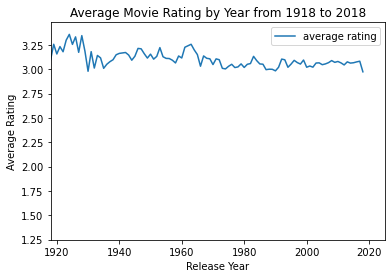

In [39]:
import matplotlib.pyplot as plt # Imports matplotlib

ratings = data.groupby(['release year'])['average rating'].mean()
ratings = ratings.reset_index()
ratings["release year"] = ratings["release year"].astype(str).astype(float)

ratings.plot(x = 'release year', y = 'average rating', title = 'Average Movie Rating by Year from 1918 to 2018', xlim = 1918, xlabel = 'Release Year', ylabel = 'Average Rating')

Over the last 100 years movies have held remakably constant in overal ratings. There has been a slight decrease but the average change over these is only about 5% from 1918 to 2018. However, this can also be due tot the number of user rtings as seen in the next two graphs.

Movie Popularity by Year

<AxesSubplot:title={'center':'Average Number Ratings by Year from 1918 to 2018'}, xlabel='Release Year', ylabel='Average Number Ratings'>

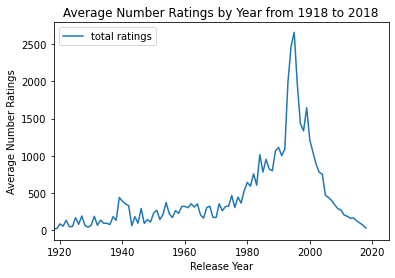

In [40]:
Yearratings = data.groupby(['release year'])['total ratings'].mean()
Yearratings = Yearratings.reset_index()
Yearratings["release year"] = Yearratings["release year"].astype(str).astype(float)


Yearratings.plot(x = 'release year', y = 'total ratings', title = 'Average Number Ratings by Year from 1918 to 2018', xlim = 1918, xlabel = 'Release Year', ylabel = 'Average Number Ratings')

The average number of ratings has naturally increased for the last 100 years. The spike in user ratings in the late 1990s could be due to the inception of this data and there being a new want to use it. Also, different movie tracking system came into play making this data obsolete. 

Most Popular Year for Movies

<AxesSubplot:title={'center':'Total Movie Ratings by Year from 1918 to 2018'}, xlabel='Release Year', ylabel='Average Number Ratings (millions)'>

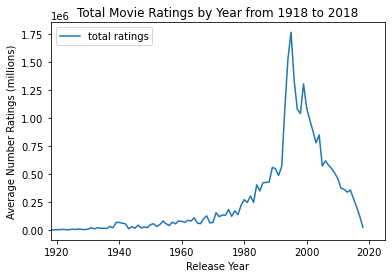

In [41]:
Year_pop = data.groupby(['release year'])['total ratings'].sum()
Year_pop = Year_pop.reset_index()
Year_pop["release year"] = Year_pop["release year"].astype(str).astype(float)

Year_pop.plot(x = 'release year', y = 'total ratings', title = 'Total Movie Ratings by Year from 1918 to 2018', xlim = 1918, xlabel = 'Release Year', ylabel = 'Average Number Ratings (millions)')

As before movies have been move popular over the last 40 years than the time bofore it. This graph follows the total movie popularity graph fairly close. However, it can be seen there isn't as dramatic of a drop in the last 20 years, meaning there are less reviewers during that timeframe

---

___By Genre___

Average Rating by Gerne

<AxesSubplot:title={'center':'Avererage Genre Rating'}, xlabel='Genre', ylabel='Average Review Score'>

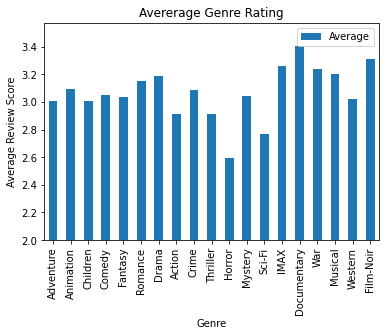

In [42]:
GenreRating.plot(x = 'Genre', kind = 'bar', title = 'Avererage Genre Rating', ylim = 2, xlabel = 'Genre', ylabel = 'Average Review Score')

The top three genres by review score are Documnetaries, Fil-Noir and IMAX, while the bottom three are Horror, Sci-Fi and Action. This can better be compared to in the following graph, Average Genre Popularity.

*The graph is zoomed in for clearity

Average popularity amonst the genres

<AxesSubplot:title={'center':'Avererage Genre Popularity'}, xlabel='Genre', ylabel='Average Number of Ratings'>

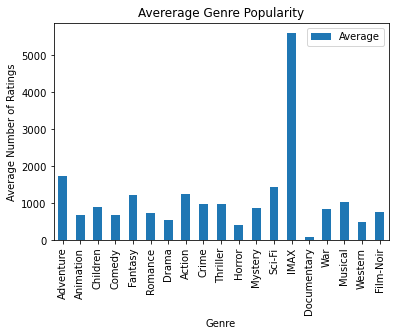

In [43]:
genrepopulation.plot(x = 'Genre', kind = 'bar', title = 'Avererage Genre Popularity', xlabel = 'Genre', ylabel = 'Average Number of Ratings')

The top three in popularity are IMAX, Adventure, and Sci-Fi, while the bottom three are Documentary, Horror, and Drama. These two data would indicate that there arentt too many people that watch documentrries, however the onse that do watch documentaries tent to really like the genre. On the other hand horror movies are at the bottom in popularity and rating, meaning people that like this genre like it for things other than the qulaity of the movies. Additionally, people who like IMAX movies really tend to like the experience and have more to say about it on average. 

## Summary

- Total number of movies: 53889
- Number of genres: 19
- Average movie rating: 3.07
- Highest rated movie: Planet Earth II (2016)
- Most popular movie: Shawshank Redemption, The (1994)
- Highest rated genre: Documentaries
- Most average rated gente: IMAX
- Lowest rated genre: Horror
- Least average rated genre: Documentaries